In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../Get_Data_BTC/BTC_Daily_ohlc.csv')

In [43]:
time_step = 5
forecast_threshold = 5
list_of_draw_low = []
list_of_draw_high = []
list_of_interval = []

previous_low = (np.argmin(df['low'].values[0:5]) ,min(df['low'].values[0:5]))
previous_high = (np.argmax(df['high'].values[0:5]) ,max(df['high'].values[0:5]))


for i in range(time_step, len(df["date"]) -1 - time_step, time_step) :
    # print(i)
    low = (np.argmin(df['low'].values[i:i+5]) + i ,min(df['low'].values[i:i+5]))
    high = (np.argmax(df['high'].values[i:i+5]) + i ,max(df['high'].values[i:i+5]))
    interval = (i - time_step, i + time_step + forecast_threshold)
    list_of_interval.append(interval)
    list_of_draw_low.append((previous_low, low))
    list_of_draw_high.append((previous_high, high))
    previous_low = low
    previous_high = high

print(list_of_interval)
print(list_of_draw_low)
print(list_of_draw_high)


[(0, 15), (5, 20), (10, 25), (15, 30), (20, 35), (25, 40), (30, 45), (35, 50), (40, 55), (45, 60), (50, 65), (55, 70), (60, 75), (65, 80), (70, 85), (75, 90), (80, 95), (85, 100), (90, 105), (95, 110), (100, 115), (105, 120), (110, 125), (115, 130), (120, 135), (125, 140), (130, 145), (135, 150), (140, 155), (145, 160), (150, 165), (155, 170), (160, 175), (165, 180), (170, 185), (175, 190), (180, 195), (185, 200), (190, 205), (195, 210), (200, 215), (205, 220), (210, 225), (215, 230), (220, 235), (225, 240), (230, 245), (235, 250), (240, 255), (245, 260), (250, 265), (255, 270), (260, 275), (265, 280), (270, 285), (275, 290), (280, 295), (285, 300), (290, 305), (295, 310), (300, 315), (305, 320), (310, 325), (315, 330), (320, 335), (325, 340), (330, 345), (335, 350), (340, 355), (345, 360), (350, 365), (355, 370), (360, 375), (365, 380), (370, 385), (375, 390), (380, 395), (385, 400), (390, 405), (395, 410), (400, 415), (405, 420), (410, 425), (415, 430), (420, 435), (425, 440), (430, 

In [41]:
def candleplot(df, list_of_draw_low, list_of_draw_high,  x_min = 0, x_max = len(df) , filename = "plot_BTC"):
    ## Figure params
    plt.figure(dpi = 200)
    plt.ylabel('price (dollars)')
    plt.title('Bitcoin')
    plt.xlabel('days')

    ## Import ohlc 
    opens = df['open'].values[x_min:x_max]
    truth = df['close'].values[x_min:x_max]
    highs = df['high'].values[x_min:x_max]
    lows = df['low'].values[x_min:x_max]

    ## Draw candles
    height = truth - opens
    bottom = np.where(height > 0, opens, truth + abs(height))
    color = np.where(height > 0, 'g', 'r')
    plt.bar(range(x_min,len(truth) + x_min), height, bottom=bottom, color=color, align='center')
    plt.vlines(range(x_min, x_min + len(highs)), ymin=lows, ymax=highs, color=color, linewidth=1)


    index = x_max // 5 - 2
    for elt in list_of_draw_low[index-1:index] :
        x1 = elt[0][0]
        y1 = elt[0][1]
        x2 = elt[1][0]
        y2 = elt[1][1]
        plt.plot([x1,x2],[y1,y2], linewidth=1)

    for elt in list_of_draw_high[index-1:index] :
        x1 = elt[0][0]
        y1 = elt[0][1]
        x2 = elt[1][0]
        y2 = elt[1][1]
        plt.plot([x1,x2],[y1,y2], linewidth=1)      


    plt.savefig(f'./plot/{filename}')

            

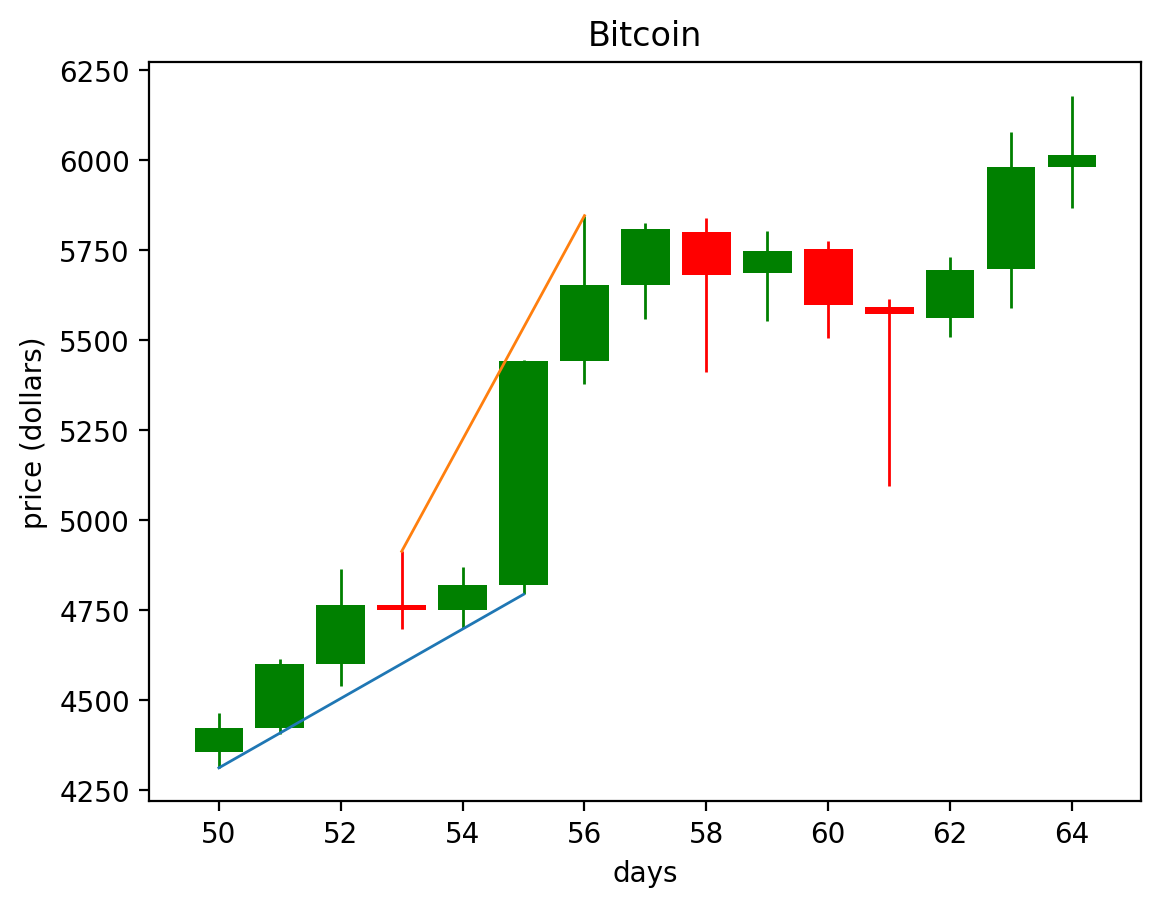

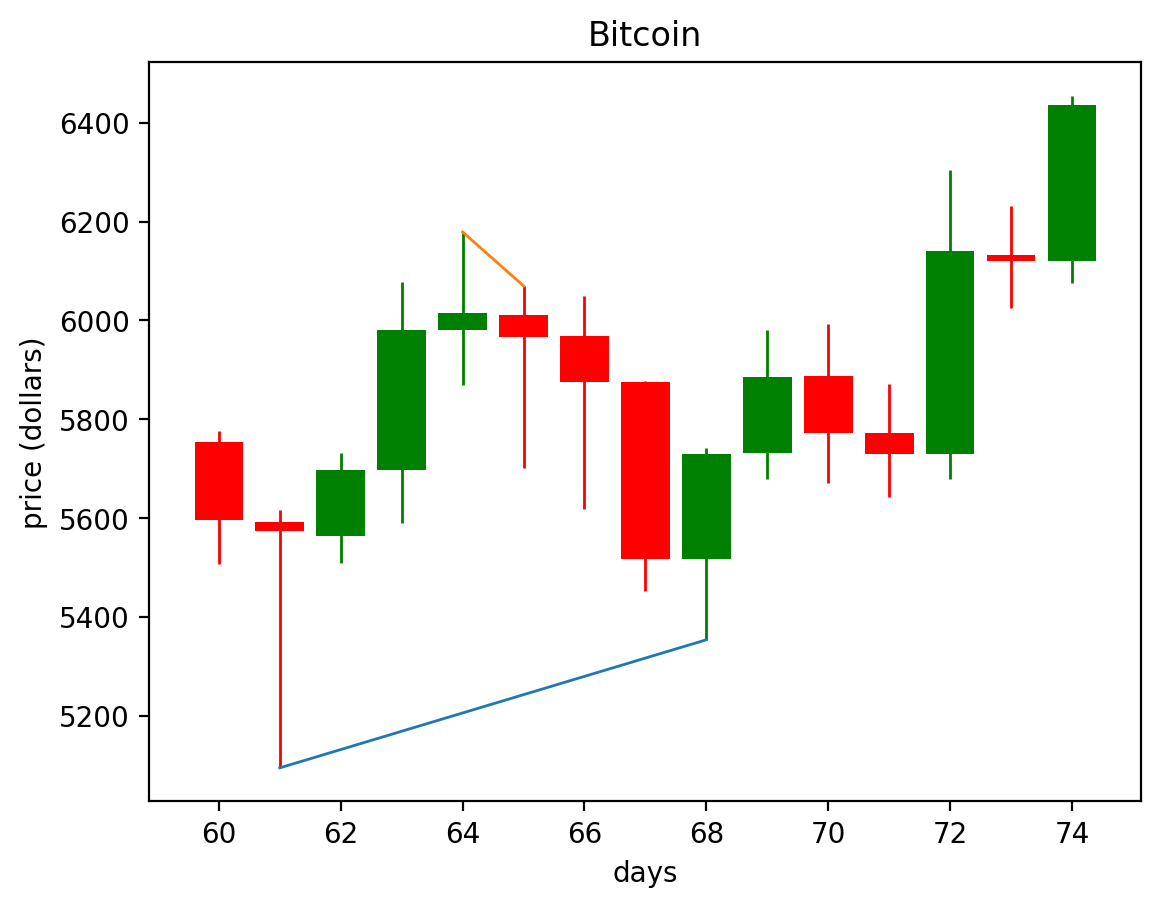

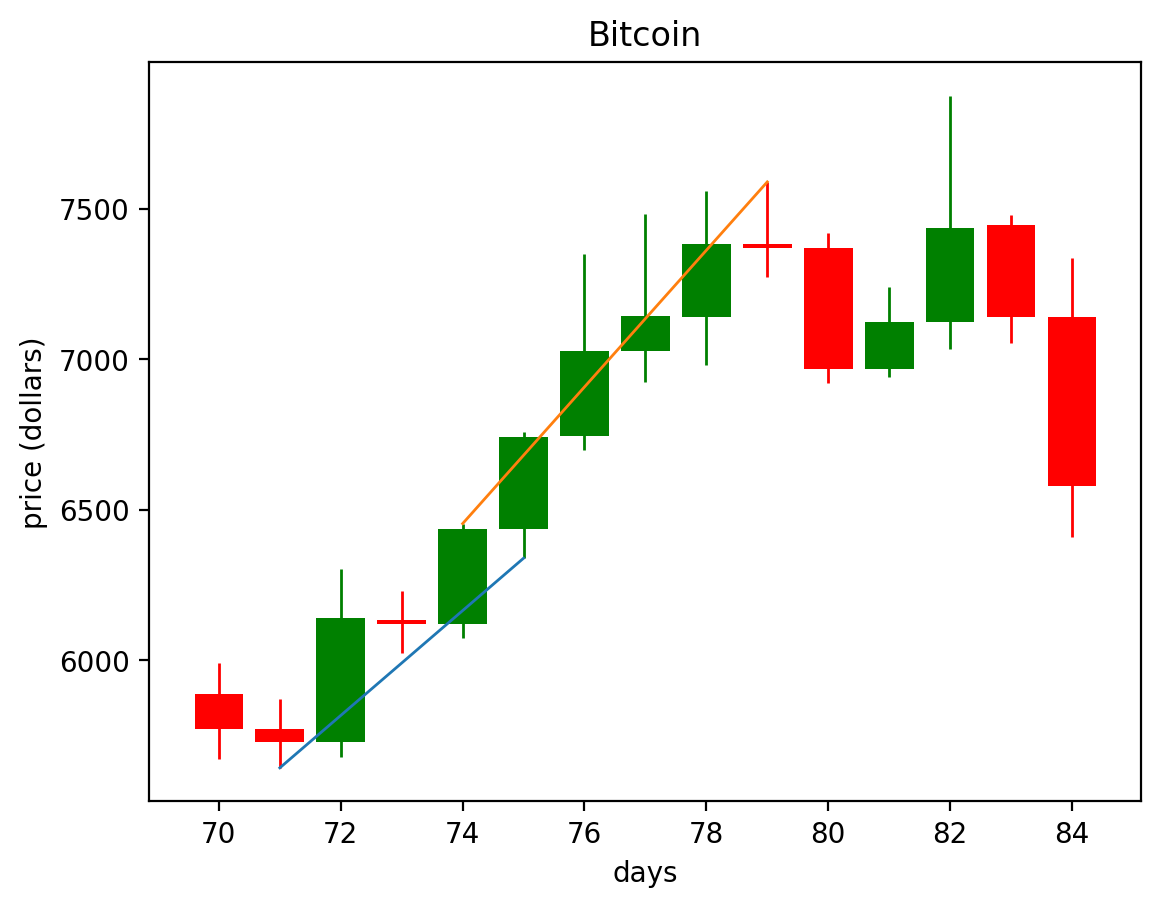

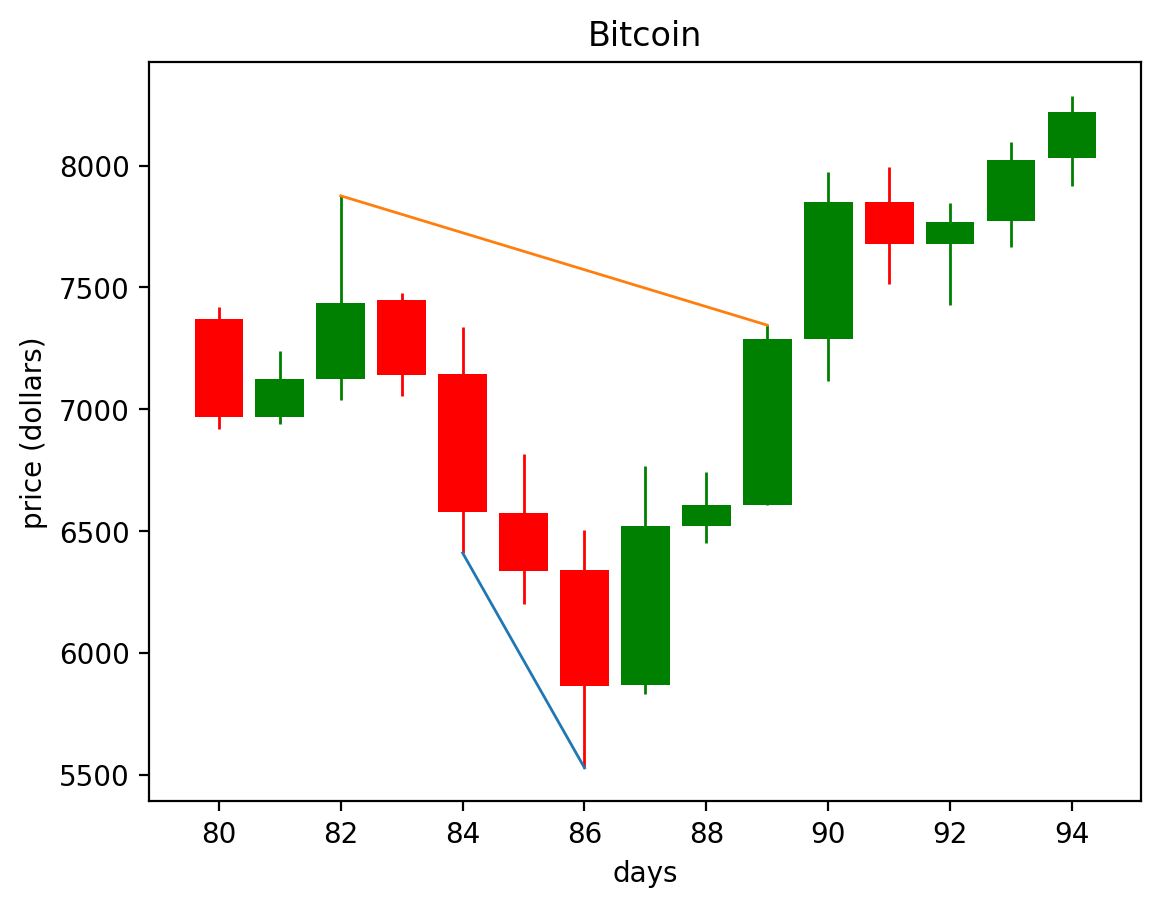

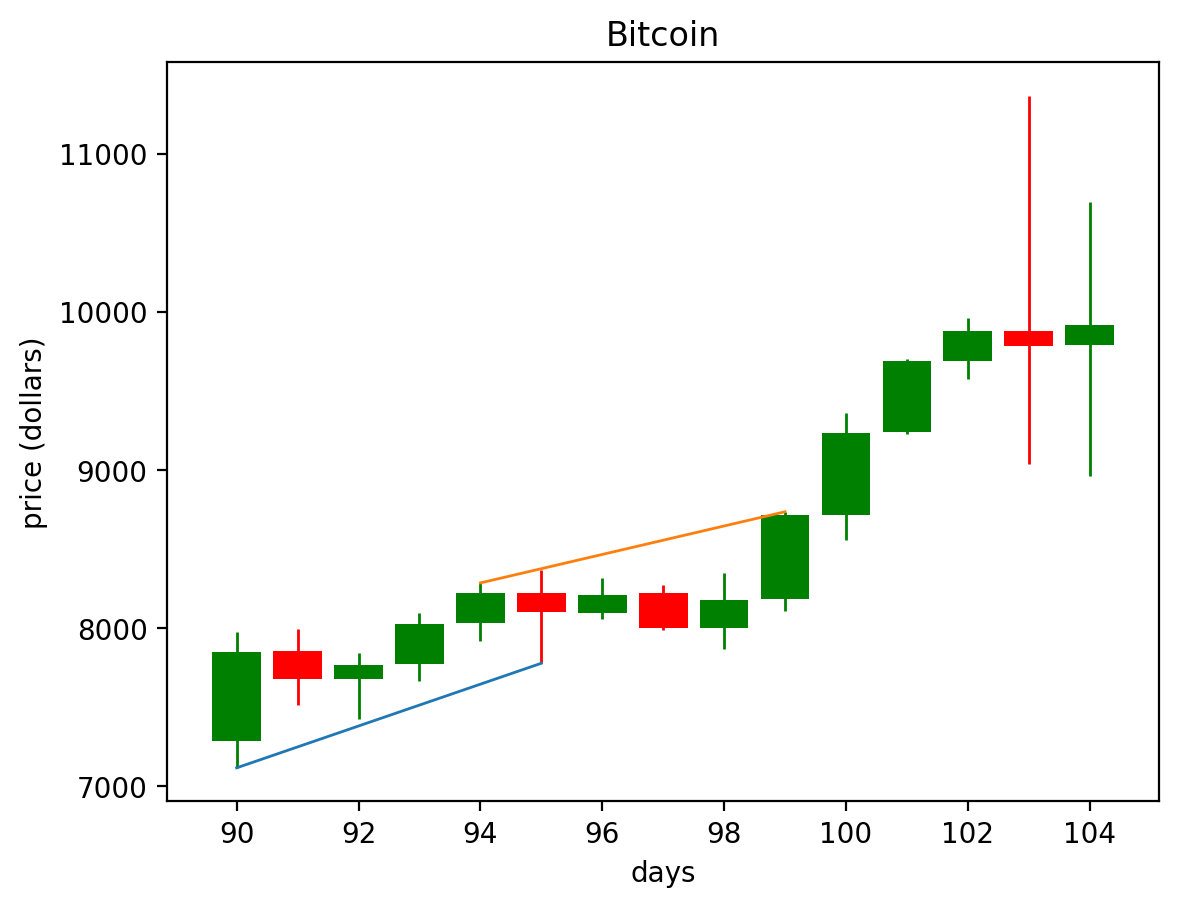

In [44]:
candleplot(df, list_of_draw_low, list_of_draw_high, x_min = 50 , x_max = 65, filename= "test")
candleplot(df, list_of_draw_low, list_of_draw_high,x_min = 60 , x_max = 75, filename= "test")
candleplot(df, list_of_draw_low, list_of_draw_high,x_min = 70 , x_max = 85, filename= "test")
candleplot(df, list_of_draw_low, list_of_draw_high,x_min = 80 , x_max = 95, filename= "test")
candleplot(df, list_of_draw_low, list_of_draw_high,x_min = 90 , x_max = 105, filename= "test")